In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 7)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap

In [6]:
def DrawResult(classifier, title):
    X_set, y_set = scaler.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-10, X_set[:, 0].max()+10, 0.25),
                        np.arange(X_set[:, 1].min()-1000, X_set[:, 1].max()+1000, 25))
    all_points = np.array([X1.ravel(), X2.ravel()]).T
    plt.contourf(X1, X2, classifier.predict(scaler.transform(all_points)).reshape(X1.shape), alpha = 0.7, cmap = ListedColormap(("red", "blue")))
    for i in range(0, 2):
        plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = ListedColormap(("red", "blue"))(i), label = i)
    real_title = f"{title} Accuracy : {classifier.score(X_test, y_test)}"
    plt.title(real_title, fontdict={"color": "green"})

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4408\4186473361.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = ListedColormap(("red", "blue"))(i), label = i)


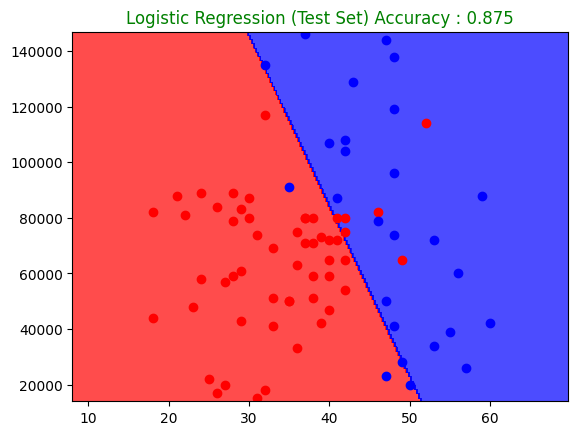

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=7)
classifier.fit(X_train, y_train)
DrawResult(classifier, "Logistic Regression (Test Set)")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4408\4186473361.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = ListedColormap(("red", "blue"))(i), label = i)


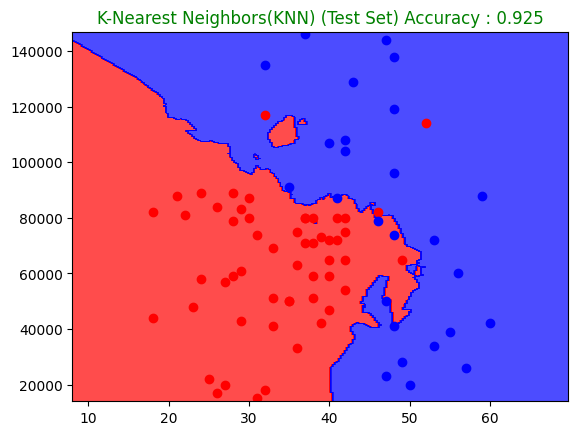

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2, )
knnclassifier.fit(X_train, y_train)
DrawResult(knnclassifier, "K-Nearest Neighbors(KNN) (Test Set)")